<a href="https://colab.research.google.com/github/Sweta-Das/CODSOFT/blob/main/codsoft_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

In [3]:
#Loading dataset
from google.colab import drive
drive.mount('/content/drive')
dataset = pd.read_csv('drive/MyDrive/Colab Notebooks/CODSOFT/tested.csv')

Mounted at /content/drive


### Understanding Data

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [5]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
# Counting different types of passenger's class
dataset["Pclass"].value_counts()

3    218
1    107
2     93
Name: Pclass, dtype: int64

Variables provided in the dataset:</br>
- Surviced: 1 = alive; 0 = died
- Pclass: Passenger's class; 1 = higher class with expensive fare, 2 = medium class, 3 = lower class
- SibSp: Number of siblings/spouses aboard
- Parch: Number of parents/children aboard

In [7]:
# Counting numbers of males & females in the ship
dataset["Sex"].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [8]:
# Summary on numerical attributes of dataset
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Data Cleaning

In [9]:
median = dataset['Age'].median()
print(median)
dataset["Age"].fillna(median, inplace = True)

27.0


array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

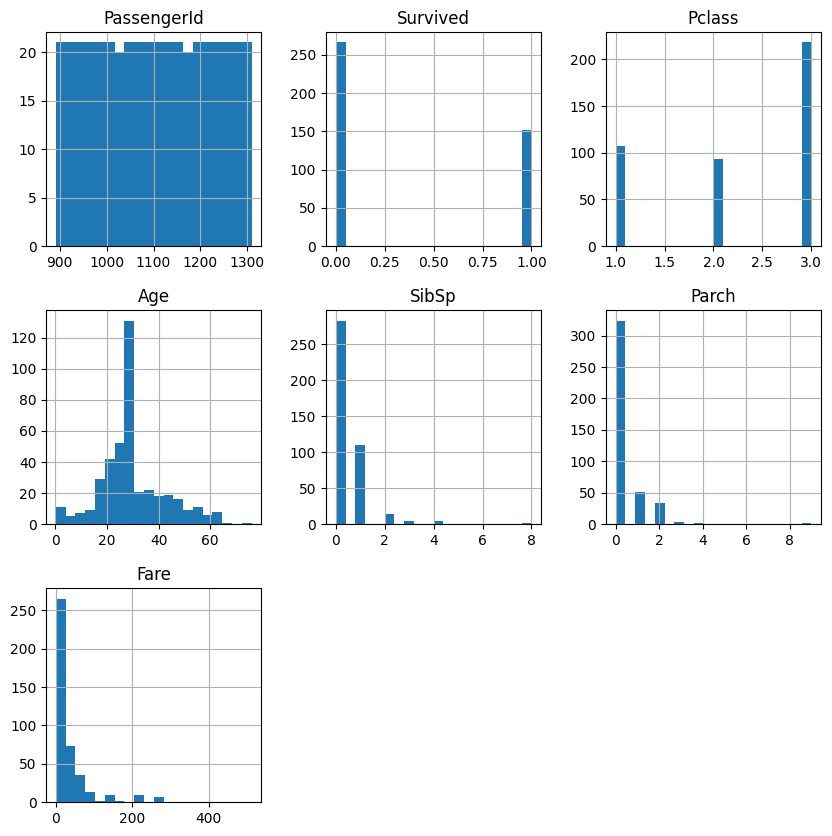

In [10]:
# Visualizing Dataset
import matplotlib.pyplot as plt

dataset.hist(bins=20, figsize=(10, 10))

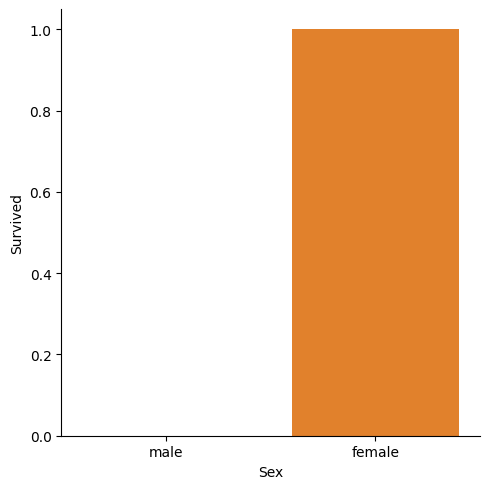

In [11]:
import seaborn as sns

sns.catplot(data=dataset, x = "Sex", y="Survived", kind="bar")

This shows almost all female survived.

<Axes: xlabel='Age', ylabel='Survived'>

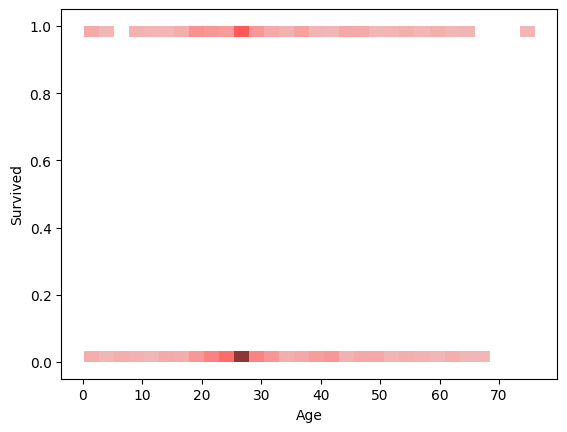

In [12]:
sns.histplot(data=dataset, x = "Age", y="Survived", bins = 30, color = "red")

In terms of age, almost every different age group were affected except above 70 years, mostly affecting the the people from 20-30 years.

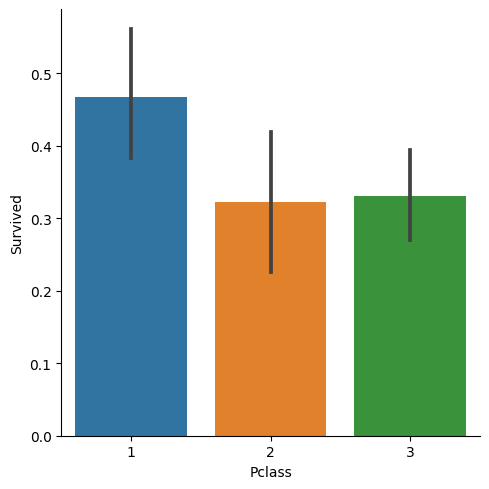

In [13]:
sns.catplot(data=dataset, x = "Pclass", y="Survived", kind="bar")

This indicate that passenger class 1 people mostly made out alive.

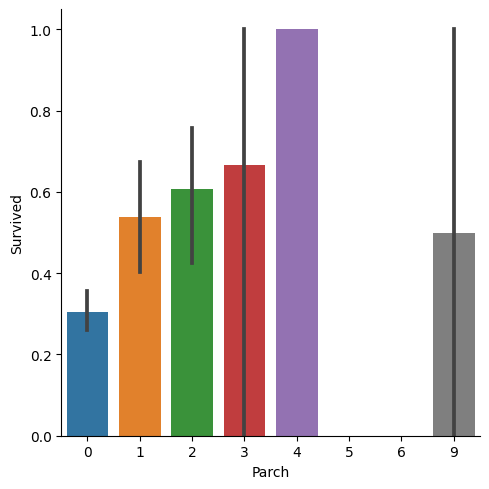

In [14]:
sns.catplot(data=dataset, x = "Parch", y="Survived", kind="bar")

Among parents and children, mostly children were saved.

In [15]:
# Encoding categorical attribute - dataset['Sex']
# Performing One-Hot Encoding
from sklearn.preprocessing import OneHotEncoder
cat_enc = OneHotEncoder()
sex_enc1hot = cat_enc.fit_transform(dataset[['Sex']])

# cat_enc object has an attribute "categories_" which stores the array of categories sequentially, and those categories serve as new columns
dataset[cat_enc.categories_[0]] = sex_enc1hot.toarray()
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,female,male
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0.0,1.0
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1.0,0.0
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0.0,1.0
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0.0,1.0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1.0,0.0


### Splitting dataset

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    dataset[['Pclass', 'Age', 'male', 'female', 'SibSp', 'Parch']], dataset['Survived'], test_size=0.2)

### Training Model

In [17]:
# Using KNN
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [18]:
# Training and test scores
print("Training accuracy: ", knn.score(X_train, y_train))

# print("Test set predictions: {}".format(knn.predict(X_test)))
print("Test accuracy: ", knn.score(X_test, y_test))

Training accuracy:  0.8772455089820359
Test accuracy:  0.8690476190476191


This shows that KNN model accuracy is about 82% in Training set while 77% in test set.

In [19]:
# Using Logistic Regression
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

log_reg.fit(X_train, y_train)

LogisticRegression()

In [20]:
# Training and test scores
print("Training accuracy: ", log_reg.score(X_train, y_train))

print("Test set predictions: {}".format(log_reg.predict(X_test)))
print("Test accuracy: ", log_reg.score(X_test, y_test))

Training accuracy:  1.0
Test set predictions: [1 0 0 1 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 0
 1 0 0 1 0 1 0 0 0 1]
Test accuracy:  1.0


100% result in both scores signify underfitting.

In [21]:
# Using Logistic Regression with parameter 'C = 0.01'
# parameter 'C' tells the model to give more weight to the complexity of training data at the cost of fitting data
log_reg_1 = LogisticRegression(C=0.01)

log_reg_1.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [22]:
# Training and test scores
print("Training accuracy: ", log_reg_1.score(X_train, y_train))

# print("Test set predictions: {}".format(log_reg_1.predict(X_test)))
print("Test accuracy: ", log_reg_1.score(X_test, y_test))

Training accuracy:  1.0
Test accuracy:  1.0


Logistic Regression model gives slightly better result than KNN model with training set accuracy of 89.45% and test set accuracy of 82.86%.

In [23]:
# Using Support Vector Machine (SVM)
from sklearn.svm import LinearSVC
svc = LinearSVC(max_iter = 100000)

svc.fit(X_train, y_train)

LinearSVC(max_iter=100000)

In [24]:
# Training and test scores
print("Training accuracy: ", svc.score(X_train, y_train))

# print("Test set predictions: {}".format(svc.predict(X_test)))
print("Test accuracy: ", svc.score(X_test, y_test))

Training accuracy:  1.0
Test accuracy:  1.0


Underfitting output again.

In [25]:
svc_1 = LinearSVC(C=0.001, max_iter = 100000)

svc_1.fit(X_train, y_train)

LinearSVC(C=0.001, max_iter=100000)

In [26]:
# Training and test scores
print("Training accuracy: ", svc_1.score(X_train, y_train))

# print("Test set predictions: {}".format(svc.predict(X_test)))
print("Test accuracy: ", svc_1.score(X_test, y_test))

Training accuracy:  0.9670658682634731
Test accuracy:  0.9761904761904762


Support Vector Machine Classifier gives comparatively better result on test set than Logistic Regression model